In [1]:
%pip install pandas numpy matplotlib tensorflow scikit-learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/raqueeb/TensorFlow2/master/datasets/geoloc_elev.csv')
df.head()

,lat,lon,elev,source,target
0,0.106264,0.068264,0.542477,S,1
1,0.099569,0.132094,0.722289,C,1
2,-0.775751,-0.814161,0.214760,S,0
3,-0.159833,0.040773,0.478576,S,1
4,-0.096395,0.021420,0.270322,C,1


In [4]:
X=df[['lat','lon']].values
y=df['target'].values

<Axes: xlabel='lat', ylabel='lon'>

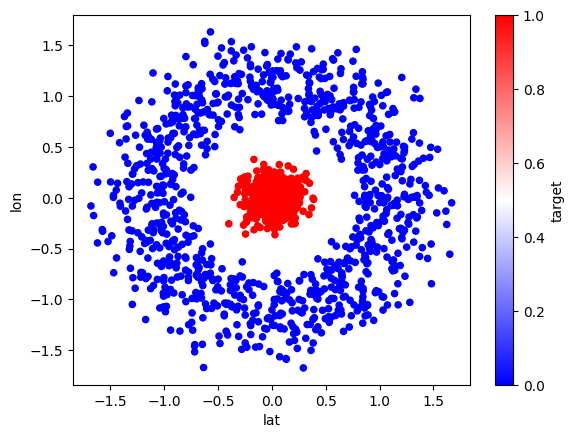

In [9]:
df.plot(kind='scatter', x='lat', y='lon', c='target', cmap="bwr")

In [11]:
from math import gamma
from sklearn.svm import SVC
clf=SVC(gamma='auto')
clf.fit(X,y)

SVC(gamma='auto')

In [14]:
from mlxtend.plotting import plot_decision_regions



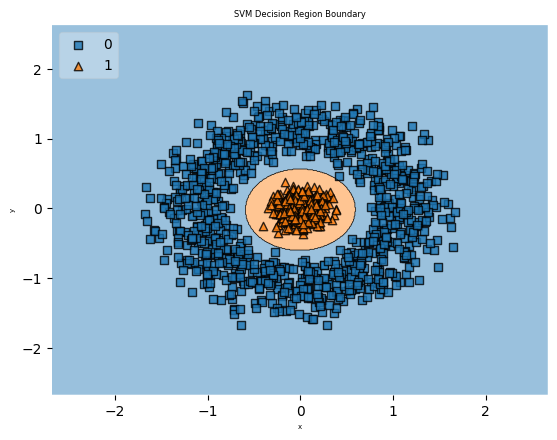

In [15]:
plot_decision_regions(X=X, y=y, clf=clf, legend=2)
plt.xlabel("x", size=5)
plt.ylabel("y", size=5)
plt.title('SVM Decision Region Boundary', size=6)
plt.show()



In [16]:
X,y

(array([[ 0.10626397,  0.06826424],
        [ 0.09956857,  0.13209422],
        [-0.77575094, -0.8141608 ],
        ...,
        [ 1.34793768,  0.02077793],
        [ 1.26606003, -0.01675063],
        [ 1.10595111, -0.07685713]]),
 array([1, 1, 0, ..., 0, 0, 0]))

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
    test_size = 0.3, random_state=0)


In [18]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)



LogisticRegression()

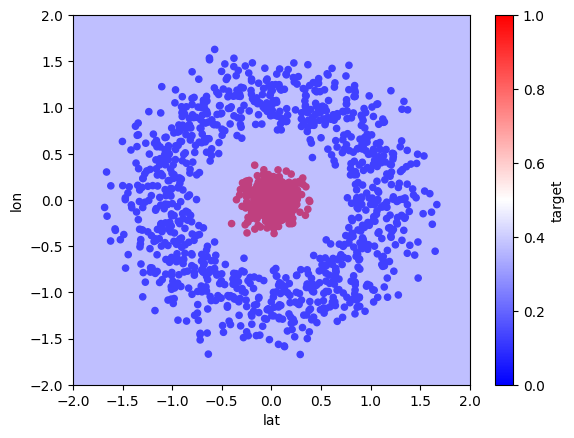

In [19]:
hticks = np.linspace(-2, 2, 101)
vticks = np.linspace(-2, 2, 101)
aa, bb = np.meshgrid(hticks, vticks)
ab = np.c_[aa.ravel(), bb.ravel()]

c = lr.predict(ab)
cc = c.reshape(aa.shape)

ax = df.plot(kind='scatter', c='target', x='lat', y='lon', cmap='bwr')
ax.contourf(aa, bb, cc, cmap='bwr', alpha=0.5)

In [21]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_dim=2, activation='tanh'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(tf.keras.optimizers.SGD(), 'binary_crossentropy', metrics=['accuracy'])
result = model.fit(X_train, y_train, epochs=20, validation_split=0.1)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5003 - loss: 0.7063 - val_accuracy: 0.4476 - val_loss: 0.6960
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4429 - loss: 0.6978 - val_accuracy: 0.4190 - val_loss: 0.6905
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3989 - loss: 0.6950 - val_accuracy: 0.3810 - val_loss: 0.6859
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3603 - loss: 0.6962 - val_accuracy: 0.3905 - val_loss: 0.6819
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4112 - loss: 0.6748 - val_accuracy: 0.4000 - val_loss: 0.6785
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3964 - loss: 0.6769 - val_accuracy: 0.4095 - val_loss: 0.6755
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4028 - loss: 0.6714 - val_accuracy: 0.4190 - val_loss: 0.6728
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4189 - loss: 0.6699 - val_accuracy: 0.4190 - val_loss

319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


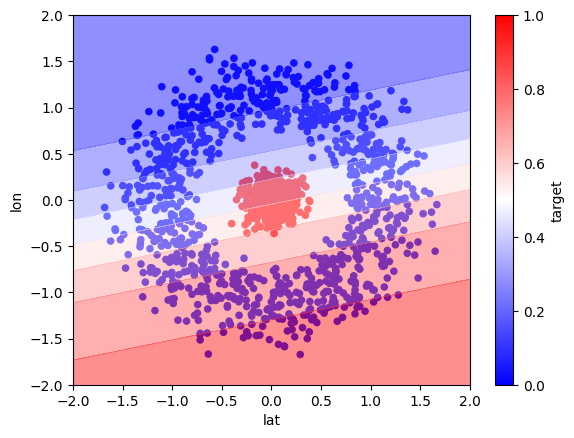

In [22]:
hticks = np.linspace(-2, 2, 101)
vticks = np.linspace(-2, 2, 101)
aa, bb = np.meshgrid(hticks, vticks)
ab = np.c_[aa.ravel(), bb.ravel()]

c = model.predict(ab)
cc = c.reshape(aa.shape)

ax = df.plot(kind='scatter', c='target', x='lat', y='lon', cmap='bwr')
ax.contourf(aa, bb, cc, cmap='bwr', alpha=0.5)


In [26]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(4, input_dim=2, activation='tanh'),
    # এই লেয়ার পরে যোগ করে আমরা দেখবো 
    # tf.keras.layers.Dense(4, activation='tanh'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(tf.keras.optimizers.SGD(learning_rate=0.5), 'binary_crossentropy', metrics=['accuracy'])
h = model.fit(X_train, y_train, epochs=20, validation_split=0.1)



Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5928 - loss: 0.6617 - val_accuracy: 0.6381 - val_loss: 0.6401
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6654 - loss: 0.6164 - val_accuracy: 0.6000 - val_loss: 0.5918
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6280 - loss: 0.5631 - val_accuracy: 0.5905 - val_loss: 0.5112
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7880 - loss: 0.4649 - val_accuracy: 0.8476 - val_loss: 0.4404
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8941 - loss: 0.3846 - val_accuracy: 0.8762 - val_loss: 0.3961
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9023 - loss: 0.3317 - val_accuracy: 0.8667 - val_loss: 0.3576
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8812 - loss: 0.3223 - val_accuracy: 0.8476 - val_loss: 0.3424
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9034 - loss: 0.2795 - val_accuracy: 0.9143 - val_loss:

319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


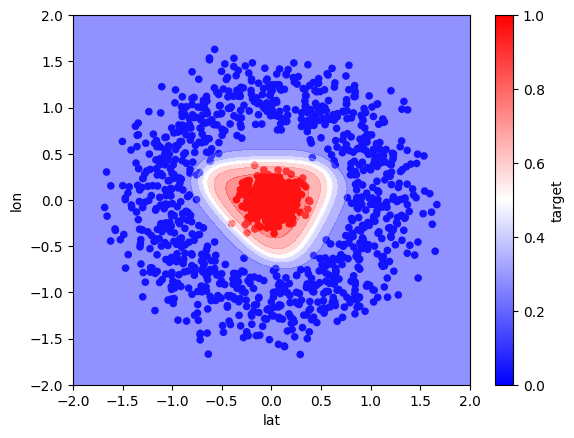

In [27]:
hticks = np.linspace(-2, 2, 101)
vticks = np.linspace(-2, 2, 101)
aa, bb = np.meshgrid(hticks, vticks)
ab = np.c_[aa.ravel(), bb.ravel()]

c = model.predict(ab)
cc = c.reshape(aa.shape)

ax = df.plot(kind='scatter', c='target', x='lat', y='lon', cmap='bwr')
ax.contourf(aa, bb, cc, cmap='bwr', alpha=0.5)